# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5','pionminus100_v1']
filename2 = 'electron1'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

In [14]:
data1 = pd.read_csv(filepath+f'{filenames1[0]}.csv')
data1.loc[data1['phi0'] > -99, 'phi0'] = 0
for ifile in range(1,len(filenames1)):
    idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
    idata.loc[idata['phi0'] > -99, 'phi0'] = 0
    data1 = pd.concat([data1,idata], sort=False)
data1 = pd.concat([data1,data1], sort=False)
data1 = pd.concat([data1,data1], sort=False)
data1 = pd.concat([data1,data1], sort=False)
#data1 = pd.concat([data1,data1], sort=False)
    
data2 = pd.read_csv(filepath+f'{filename2}.csv')
data2.loc[data2['phi0'] > -99, 'phi0'] = 1
#data2 = data2[:100000]

In [15]:
data = pd.concat([data1,data2], sort=False)
data = data.sample(frac = 1)
data['phi0'] = data['phi0'].astype('int32')
data['centrality'] = data['centrality'].astype('int32')
data['zvertex'] = data['zvertex'].astype('float16')
data['pt'] = data['pt'].astype('float16')
data['e/p'] = data['e/p'].astype('float16')
data['n0'] = data['n0'].astype('int32')
data['disp'] = data['disp'].astype('float16')
data['chi2'] = data['chi2'].astype('float16')
data['npe0'] = data['npe0'].astype('int32')
data['prob'] = data['prob'].astype('float16')
data.head()

,centrality,zvertex,pt,e/p,n0,disp,chi2,npe0,prob,phi0
165872,16,-6.445312,0.614258,0.674805,2,2.244141,113.875000,1,0.511719,0
271650,77,-3.271484,0.452881,0.947266,1,6.511719,23.343750,2,0.592773,0
42036,29,9.968750,0.652832,0.858887,2,8.039062,27.156250,4,0.000264,0
82047,57,-1.202148,0.400391,0.972168,1,6.953125,44.531250,0,0.859863,0
1055376,26,-9.109375,0.548340,0.737793,5,2.976562,25.140625,6,0.794434,1


In [16]:
data['disp2'] = data.apply(lambda row: row['disp']**2, axis=1)
data['n0*disp'] = data.apply(lambda row: (row['n0']-2)/(1+row['disp']), axis=1)
data['n0*disp2'] = data.apply(lambda row: (row['n0']-2)/(1+row['disp'])**0.5, axis=1)
data['chi2/npe0'] = data.apply(lambda row: row['chi2']/(row['npe0']+0.001), axis=1)
data['e/p*prob'] = data.apply(lambda row:  math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2*(row['prob']), axis=1)
data['n0*prob'] = data.apply(lambda row: (row['n0']-2)*(row['prob']+0.001), axis=1)
data['prob-1'] = data.apply(lambda row: 1./(1.00001-row['prob'])**0.5, axis=1)
data['e/p*pt'] = data.apply(lambda row: ((row['pt'])**0.5)*math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2, axis=1)
data['n0*pt'] = data.apply(lambda row: (row['n0']-2)*(row['pt']+0.001)**0.5, axis=1)
#data['e/p*centrality'] = data.apply(lambda row: row['e/p']*(row['centrality']+0.001)**0.5, axis=1)
#data['n0*centrality'] = data.apply(lambda row: row['n0']*(row['centrality']+0.001)**0.5, axis=1)
data['n0-2'] = data.apply(lambda row: (row['n0']-2)*(row['n0']), axis=1)
data['e/p-0.8'] = data.apply(lambda row: math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2, axis=1)
data['pt-1'] = data.apply(lambda row: row['pt']**-1, axis=1)
data['pt2'] = data.apply(lambda row: row['pt']**2, axis=1)
data['centrality-2'] = data.apply(lambda row: row['centrality']**-2, axis=1)
data.head()

,centrality,zvertex,pt,e/p,n0,disp,chi2,npe0,prob,phi0,...,e/p*prob,n0*prob,prob-1,e/p*pt,n0*pt,n0-2,e/p-0.8,pt-1,pt2,centrality-2
165872,16,-6.445312,0.614258,0.674805,2,2.244141,113.875000,1,0.511719,0,...,-8.020611e-03,0.000000,1.431069,-0.012284,0.000000,0.0,-0.015674,1.627981,0.377313,0.003906
271650,77,-3.271484,0.452881,0.947266,1,6.511719,23.343750,2,0.592773,0,...,1.285557e-02,-0.593773,1.567028,0.014595,-0.673707,-1.0,0.021687,2.208086,0.205101,0.000169
42036,29,9.968750,0.652832,0.858887,2,8.039062,27.156250,4,0.000264,0,...,9.160403e-07,0.000000,1.000127,0.002802,0.000000,0.0,0.003468,1.531788,0.426190,0.001189
82047,57,-1.202148,0.400391,0.972168,1,6.953125,44.531250,0,0.859863,0,...,2.548790e-02,-0.860863,2.671213,0.018756,-0.633554,-1.0,0.029642,2.497561,0.160313,0.000308
1055376,26,-9.109375,0.548340,0.737793,5,2.976562,25.140625,6,0.794434,1,...,-3.074231e-03,2.386301,2.205532,-0.002866,2.223524,15.0,-0.003870,1.823687,0.300677,0.001479


In [17]:
filename = 'newDB.csv'
filepath = '/home/yoren/bnl/PHENIX/ee/ML/'+filename

In [18]:
data.to_csv(filepath, index=False)

In [19]:
print(data.size, data.shape, data1.shape, data2.shape)

341659176 (14235799, 24) (12509480, 10) (1726319, 10)


In [20]:
# удалим лишние колонки
data = data.drop(columns = ['zvertex'])

In [21]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(3, 3, figsize=(15, 6))
    for i, feature in enumerate(['centrality', 'pt', 'e/p', 'n0', 'disp', 'chi2', 'npe0', 'prob', 'phi0']):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


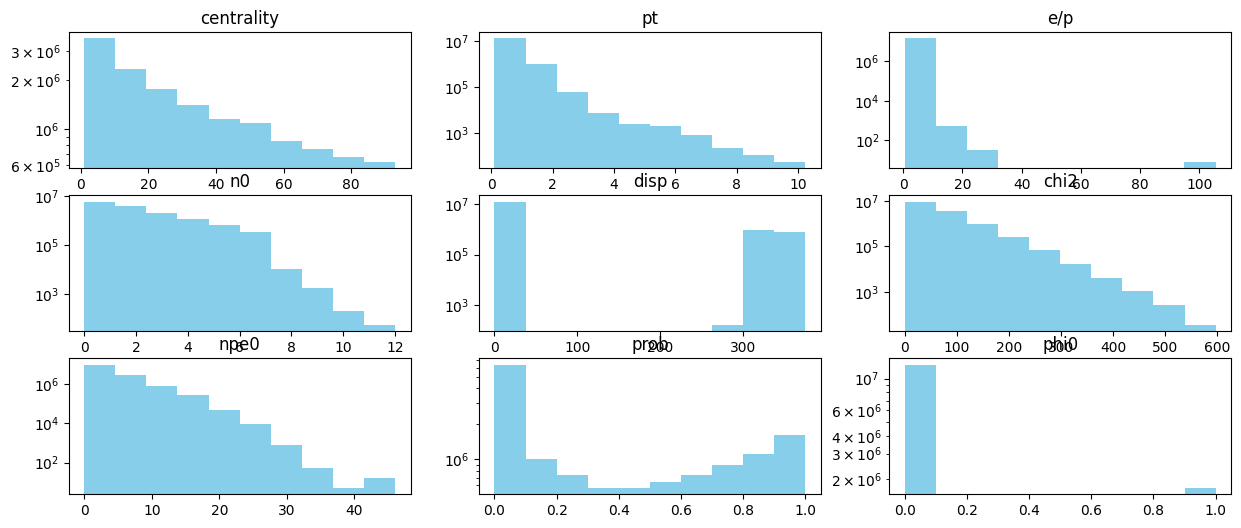

In [22]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id